In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# %matplotlib inline
%matplotlib widget

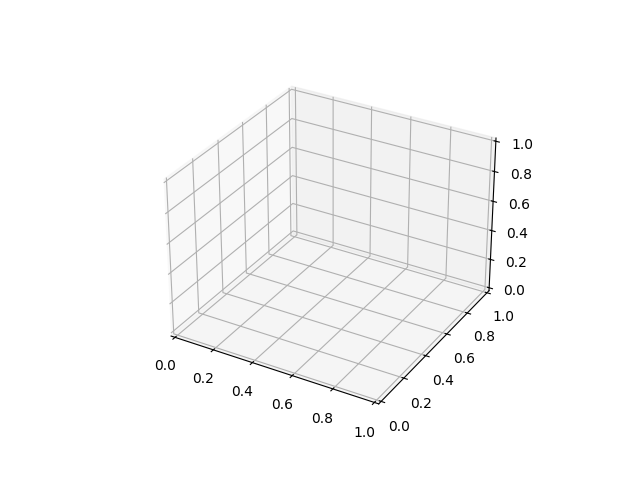

In [55]:
# Set up the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [56]:
# Create the first criss-crossing dataset (a helix)
t1 = np.linspace(0, 4 * np.pi, 60)  # 100 points from 0 to 4π
x1 = np.sin(t1)
y1 = np.cos(t1)
z1 = t1

In [57]:
# Create the second criss-crossing dataset (another helix in opposite phase)
t2 = np.linspace(0, 4 * np.pi, 60)
x2 = np.sin(t2 + np.pi)  # Opposite phase
y2 = np.cos(t2 + np.pi)
z2 = t2

In [58]:
cl1 = np.c_[x1, y1, z2]
labels1 = np.ones(len(cl1))
cl2 = np.c_[x2, y2, z2]
labels2 = np.ones(len(cl2)) + 1
inp = np.r_[cl1, cl2]
labels = np.r_[labels1, labels2]

In [59]:
def pca(X=np.array([]), no_dims=50):
    """
        Runs PCA on the NxD array X in order to reduce its dimensionality to
        no_dims dimensions.
    """

    print("Preprocessing the data using PCA...")
    (n, d) = X.shape
    X = X - np.tile(np.mean(X, 0), (n, 1))
    (l, M) = np.linalg.eig(np.dot(X.T, X))
    Y = np.dot(X, M[:, 0:no_dims])
    return Y

In [60]:
# Plot the first dataset
ax.scatter(x1, y1, z1, label='Dataset 1', color='b')

Preprocessing the data using PCA...


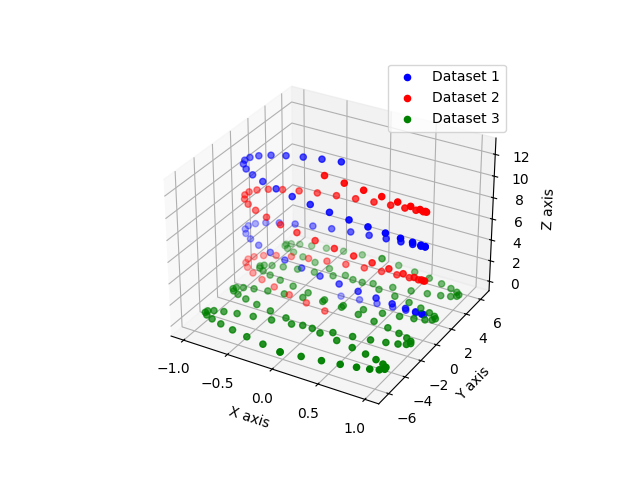

In [61]:
# Plot the second dataset
ax.scatter(x2, y2, z2, label='Dataset 2', color='r')

Y = pca(inp, no_dims=2)
ax.scatter(Y[:, 0], Y[:, 1], label='Dataset 3', color='g')
# ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], label='Dataset 3', color='g')
# Labels and legend
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.legend()

# Show the plot
plt.show()


In [74]:
Y.tolist()

[[-2.1524743902361078e-17, -6.2831853071795845],
 [0.2113826236296243, -6.070195974732819],
 [0.41321218576837815, -5.857206642286053],
 [0.5963673585385013, -5.644217309839288],
 [0.7525707698561385, -5.431227977392522],
 [0.8747630845319613, -5.218238644945757],
 [0.9574220383620055, -5.005249312498991],
 [0.9968120070307501, -4.792259980052225],
 [0.9911528310040072, -4.579270647605459],
 [0.9407002666710333, -4.366281315158694],
 [0.847734427889671, -4.153291982711928],
 [0.7164567402983153, -3.9403026502651626],
 [0.5528000653611936, -3.727313317818397],
 [0.3641605752528225, -3.5143239853716315],
 [0.15906349601907208, -3.3013346529248655],
 [-0.053222174842178525, -3.0883453204781],
 [-0.26310256422752104, -2.8753559880313344],
 [-0.46109250144932556, -2.662366655584569],
 [-0.6382441836448197, -2.4493773231378033],
 [-0.7865515558026425, -2.2363879906910373],
 [-0.8993121301712191, -2.023398658244272],
 [-0.9714298932647099, -1.8104093257975062],
 [-0.9996456111234525, -1.59741

In [45]:
cl1 = np.c_[x1, y1, z2]
cl1.shape

(60, 3)

In [14]:
cl2 = np.c_[x2, y2, z2]
cl2.shape

(100, 3)

In [16]:
np.r_[cl1, cl2].shape

(200, 3)

In [63]:
Y.shape

(120, 2)

In [65]:
!du -h output2.gif

852K	output2.gif


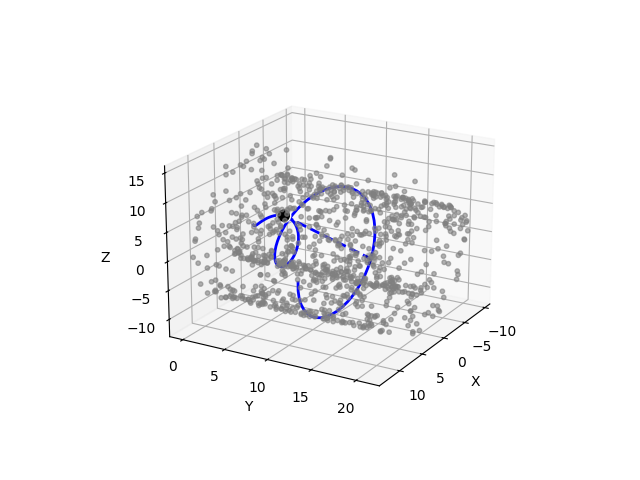

In [70]:
from sklearn.datasets import make_swiss_roll

# Generate Swiss roll data (1000 points)
n_samples = 1000
X, _ = make_swiss_roll(n_samples, noise=0.1)

# Create the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the Swiss roll points
ax.scatter(X[:, 0], X[:, 1], X[:, 2], color='gray', s=10, alpha=0.6)

# Create a curve that follows the Swiss roll shape (simplified curve for illustration)
theta = np.linspace(0, 4 * np.pi, 100)
x_curve = theta * np.cos(theta)
y_curve = theta + 0 * np.random.randn(100)  # Adding a bit of noise for random variation in y-axis
z_curve = theta * np.sin(theta)

# Plot the curve on top of the Swiss roll
ax.plot(x_curve, y_curve, z_curve, color='blue', linewidth=2)

# Highlight two specific points on the curve
highlight_points = [20, 80]  # Indices of points to highlight
ax.scatter(x_curve[highlight_points], y_curve[highlight_points], z_curve[highlight_points], 
           color='black', s=100, edgecolor='white', zorder=5)

# Plot the dashed line between the two points
ax.plot([x_curve[highlight_points[0]], x_curve[highlight_points[1]]],
        [y_curve[highlight_points[0]], y_curve[highlight_points[1]]],
        [z_curve[highlight_points[0]], z_curve[highlight_points[1]]],
        color='blue', linestyle='--', linewidth=2)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Adjust viewing angle
ax.view_init(elev=20, azim=30)

# Show the plot
plt.show()
